In [101]:
import warnings

warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt


# 2 image paths 
image_path1='Downloads/hand_image11.jpeg'
image_path2='Downloads/hand_image2.jpeg'

# load images 
im1=cv2.imread(image_path1)
im2=cv2.imread(image_path2)
img1=cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
# ASLAM SHAIK BIO M A02

 -- SHAPE -- 
(1920, 1080, 3)


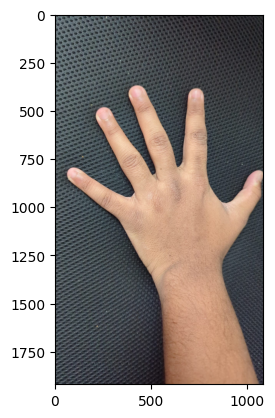

In [102]:
#  load and display image1 and its shape
plt.imshow(img1)
X1=np.float32(img1)
print(" -- SHAPE -- ")
print(X1.shape)

 -- SHAPE -- 
(1600, 1200, 3)


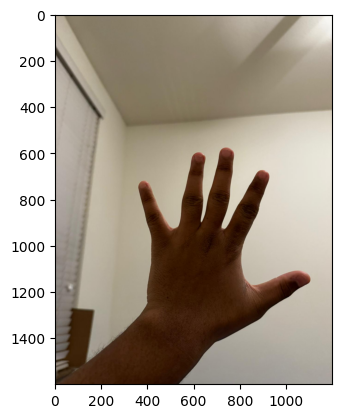

In [103]:
#  load and display image1 and its shape
plt.imshow(img2)
X2=np.float32(img2)
print(" -- SHAPE -- ")
print(X2.shape)

In [104]:
def get_k_random_clusters(k,shape,X):
    clusters_pixel=[] # [C1 , C2 ] for k = 2
    for _ in range(k):
        x = np.random.randint(0,shape[0])
        y = np.random.randint(0,shape[1])
        clusters_pixel.append(X[(x, y)])

    return clusters_pixel
    

In [105]:
def get_cluster_map(X, C):
    w, h, _ = X.shape
    cluster_map = np.zeros((w, h), dtype=np.uint8)
    
    for i in range(w):
        for j in range(h):
            cluster_map[i, j] = getMinCluster(X[i, j], C)
    return cluster_map


In [106]:
def get_new_centroid(X, cluster_map, k):
    C = [np.zeros(3,) for _ in range(k)]
    n_C = [1 for i in range(k)]
    w, h, _ = X.shape
    
    for i in range(w):
        for j in range(h):
            C[cluster_map[i, j]] += X[i, j]
            n_C[cluster_map[i, j]] += 1
            
    for cluster_i in range(k):
        C[cluster_i] /= n_C[cluster_i]


    return C


In [107]:
def getDistance(pixel, c):
    #print(pixel.shape, c.shape)
    return np.sum(np.square(pixel - c)) ** 0.5

def getMinCluster(pixel, C):
    
    distances = [getDistance(pixel, C[cluster_i]) for cluster_i in range(len(C))]
    min_distance = min(distances)
    return distances.index(min_distance)



In [108]:
def getDistances(pixel, C):
    k = len(C)
    
    distances = [getDistance(pixel, C[cluster_i]) for cluster_i in range(k)]
    return np.array(distances)

def softmax(distances):
    
    exp_distances = np.exp(-distances)
    probabilities = exp_distances / np.sum(exp_distances)
    return probabilities

def get_cluster_prob_map(X, C):
    w, h, _ = X.shape
    k = len(C)
    
    cluster_map = np.zeros((w, h, k))
    for i in range(w):
        for j in range(h):
            cluster_map[i, j] = softmax(getDistances(X[i, j], C))
            
    return cluster_map


In [109]:
def get_cluster_map(X, C):
    w, h, _ = X.shape
    cluster_map = np.zeros((w, h), dtype=np.uint8)
    
    for i in range(w):
        for j in range(h):
            cluster_map[i, j] = getMinCluster(X[i, j], C)


            
    return cluster_map

In [110]:
def get_new_centroid_prob_map(X, cluster_map, k):
    
    w, h, _ = cluster_map.shape
    
    cluster_map_temp = np.zeros((w, h), dtype=np.uint8)
    for i in range(w):
        for j in range(h):
            temp = cluster_map[i, j].tolist()
            min_value = min(temp)
            cluster_map_temp[i, j] = temp.index(min_value)
            
    new_centeroid = get_new_centroid(X, cluster_map_temp, k)
    return new_centeroid, cluster_map_temp


In [111]:
COLORS_RBG = np.array([
    [255, 0, 0],     # Red
    [0, 255, 0],     # Green
    [0, 0, 255]  ,  # Blue,
     [0, 0, 128],     # Navy
    [128, 0, 128],   # Purple
    [0, 128, 128],   # Teal

])


In [112]:
def get_overlay_filter(cluster_map, k):
    
    w, h = cluster_map.shape
    
    overlay = np.zeros((w, h, 3), dtype=np.uint8)
    
    for i in range(w):
        for j in range(h):
            overlay[i, j] = COLORS_RBG[cluster_map[i, j]]
                                       
    return overlay
    

def plot_image(image, cluster_map, k):
    plt.imshow(image)
    
    overlay = get_overlay_filter(cluster_map, k)
    plt.imshow(overlay, alpha=0.4)
    plt.axis("off")



--- CLUSTERS --- ::  2
 - CLUSTER MAP - 
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


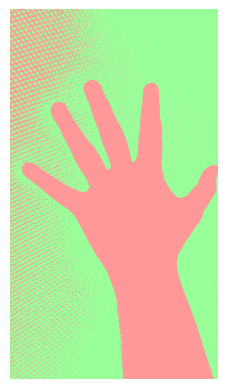

--- CLUSTERS --- ::  3
 - CLUSTER MAP - 
[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


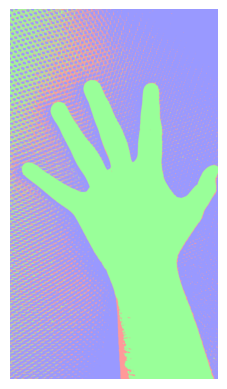

--- CLUSTERS --- ::  5
 - CLUSTER MAP - 
[[0 0 0 ... 2 2 2]
 [0 0 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


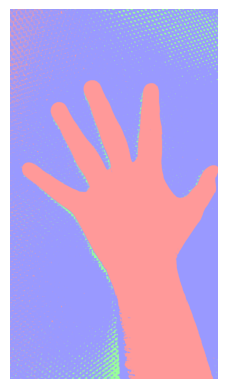

--- CLUSTERS --- ::  2
 - CLUSTER MAP - 
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


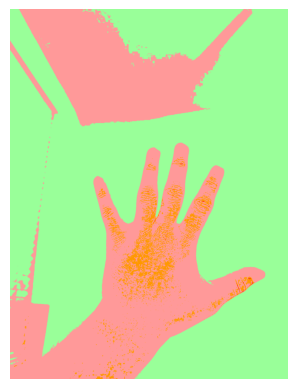

--- CLUSTERS --- ::  3
 - CLUSTER MAP - 
[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


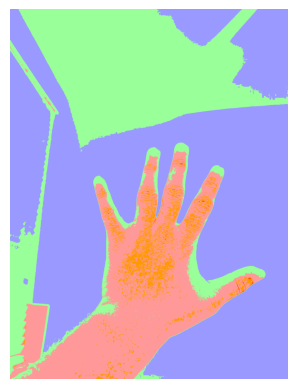

--- CLUSTERS --- ::  5
 - CLUSTER MAP - 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


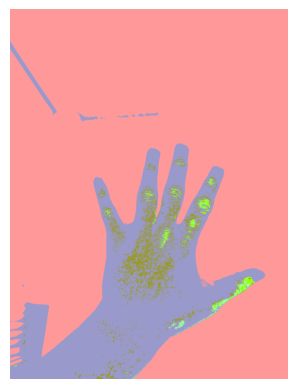

In [113]:
# ___ MAIN ___
#.
#.

# load images into array so that we can easily iterate while executing.
images=[X1,X2]
iterations=10
k_values =[2, 3, 5] # three times, for the three different values of k =2, 3, 5.

for image in images:
    for k in k_values:
    # iteration for each k
        centroids,cluster_map_indices =k_means(k,iterations,image)
        print("--- CLUSTERS --- :: ",k)

        print(' - CLUSTER MAP - ')
        print(cluster_map_indices)
        map=get_cluster_map(image,centroids)
        plot_image(image,map,k)
        plt.show()
    

In [114]:

def k_means(k,iterations,X): # number of clusters 
    
    clusters=get_k_random_clusters(k,X.shape,X) # generate clusters wrt image 1.
    
        
    cluster_map=None
    for _ in range(iterations):
        
        cluster_map=get_cluster_prob_map(X,clusters)
       
                
        return get_new_centroid_prob_map(X, cluster_map, k)
